In [1]:
import anndata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from ALLCools.plot import *
from ALLCools.clustering.doublets import coverage_doublets

In [2]:
allc_dict = {
    p.name: str(p)
    for p in pathlib.Path('/gale/netapp/entex/ENTEx/').glob(
        'Pool*_LG*/output_*/allc/LG_*tsv.gz')
}
# 
# allc_dict_2 ={
#     p.name: str(p)
#     for p in pathlib.Path('/gale/netapp/entex/ENTEx/Pool_CGCH_M1C/output_CGCH/allc/').glob(
#         '*tsv.gz')
# }

In [3]:
cell_values = coverage_doublets(allc_dict=allc_dict,
                                resolution=100,
                                cpu=10,
                                tmp_dir='LG',
                                keep_tmp=True)

In [4]:
cell_values.head()

,TotalHCB,TotalC,HCBRatio
LG_ACCPU_Plate10-1-L3-A13.allc.tsv.gz,40196,31768738,0.126527
LG_ACCPU_Plate10-1-L3-A14.allc.tsv.gz,36946,29345332,0.125901
LG_ACCPU_Plate10-1-L3-A1.allc.tsv.gz,27168,21352000,0.127239
LG_ACCPU_Plate10-1-L3-A2.allc.tsv.gz,43382,32393419,0.133922
LG_ACCPU_Plate10-1-L3-B13.allc.tsv.gz,56114,38578371,0.145455


In [12]:
cell_values['HCBRatio2'] = cell_values['HCBRatio'] / cell_values['TotalC'] * 1000000

[(0.0, 0.1)]

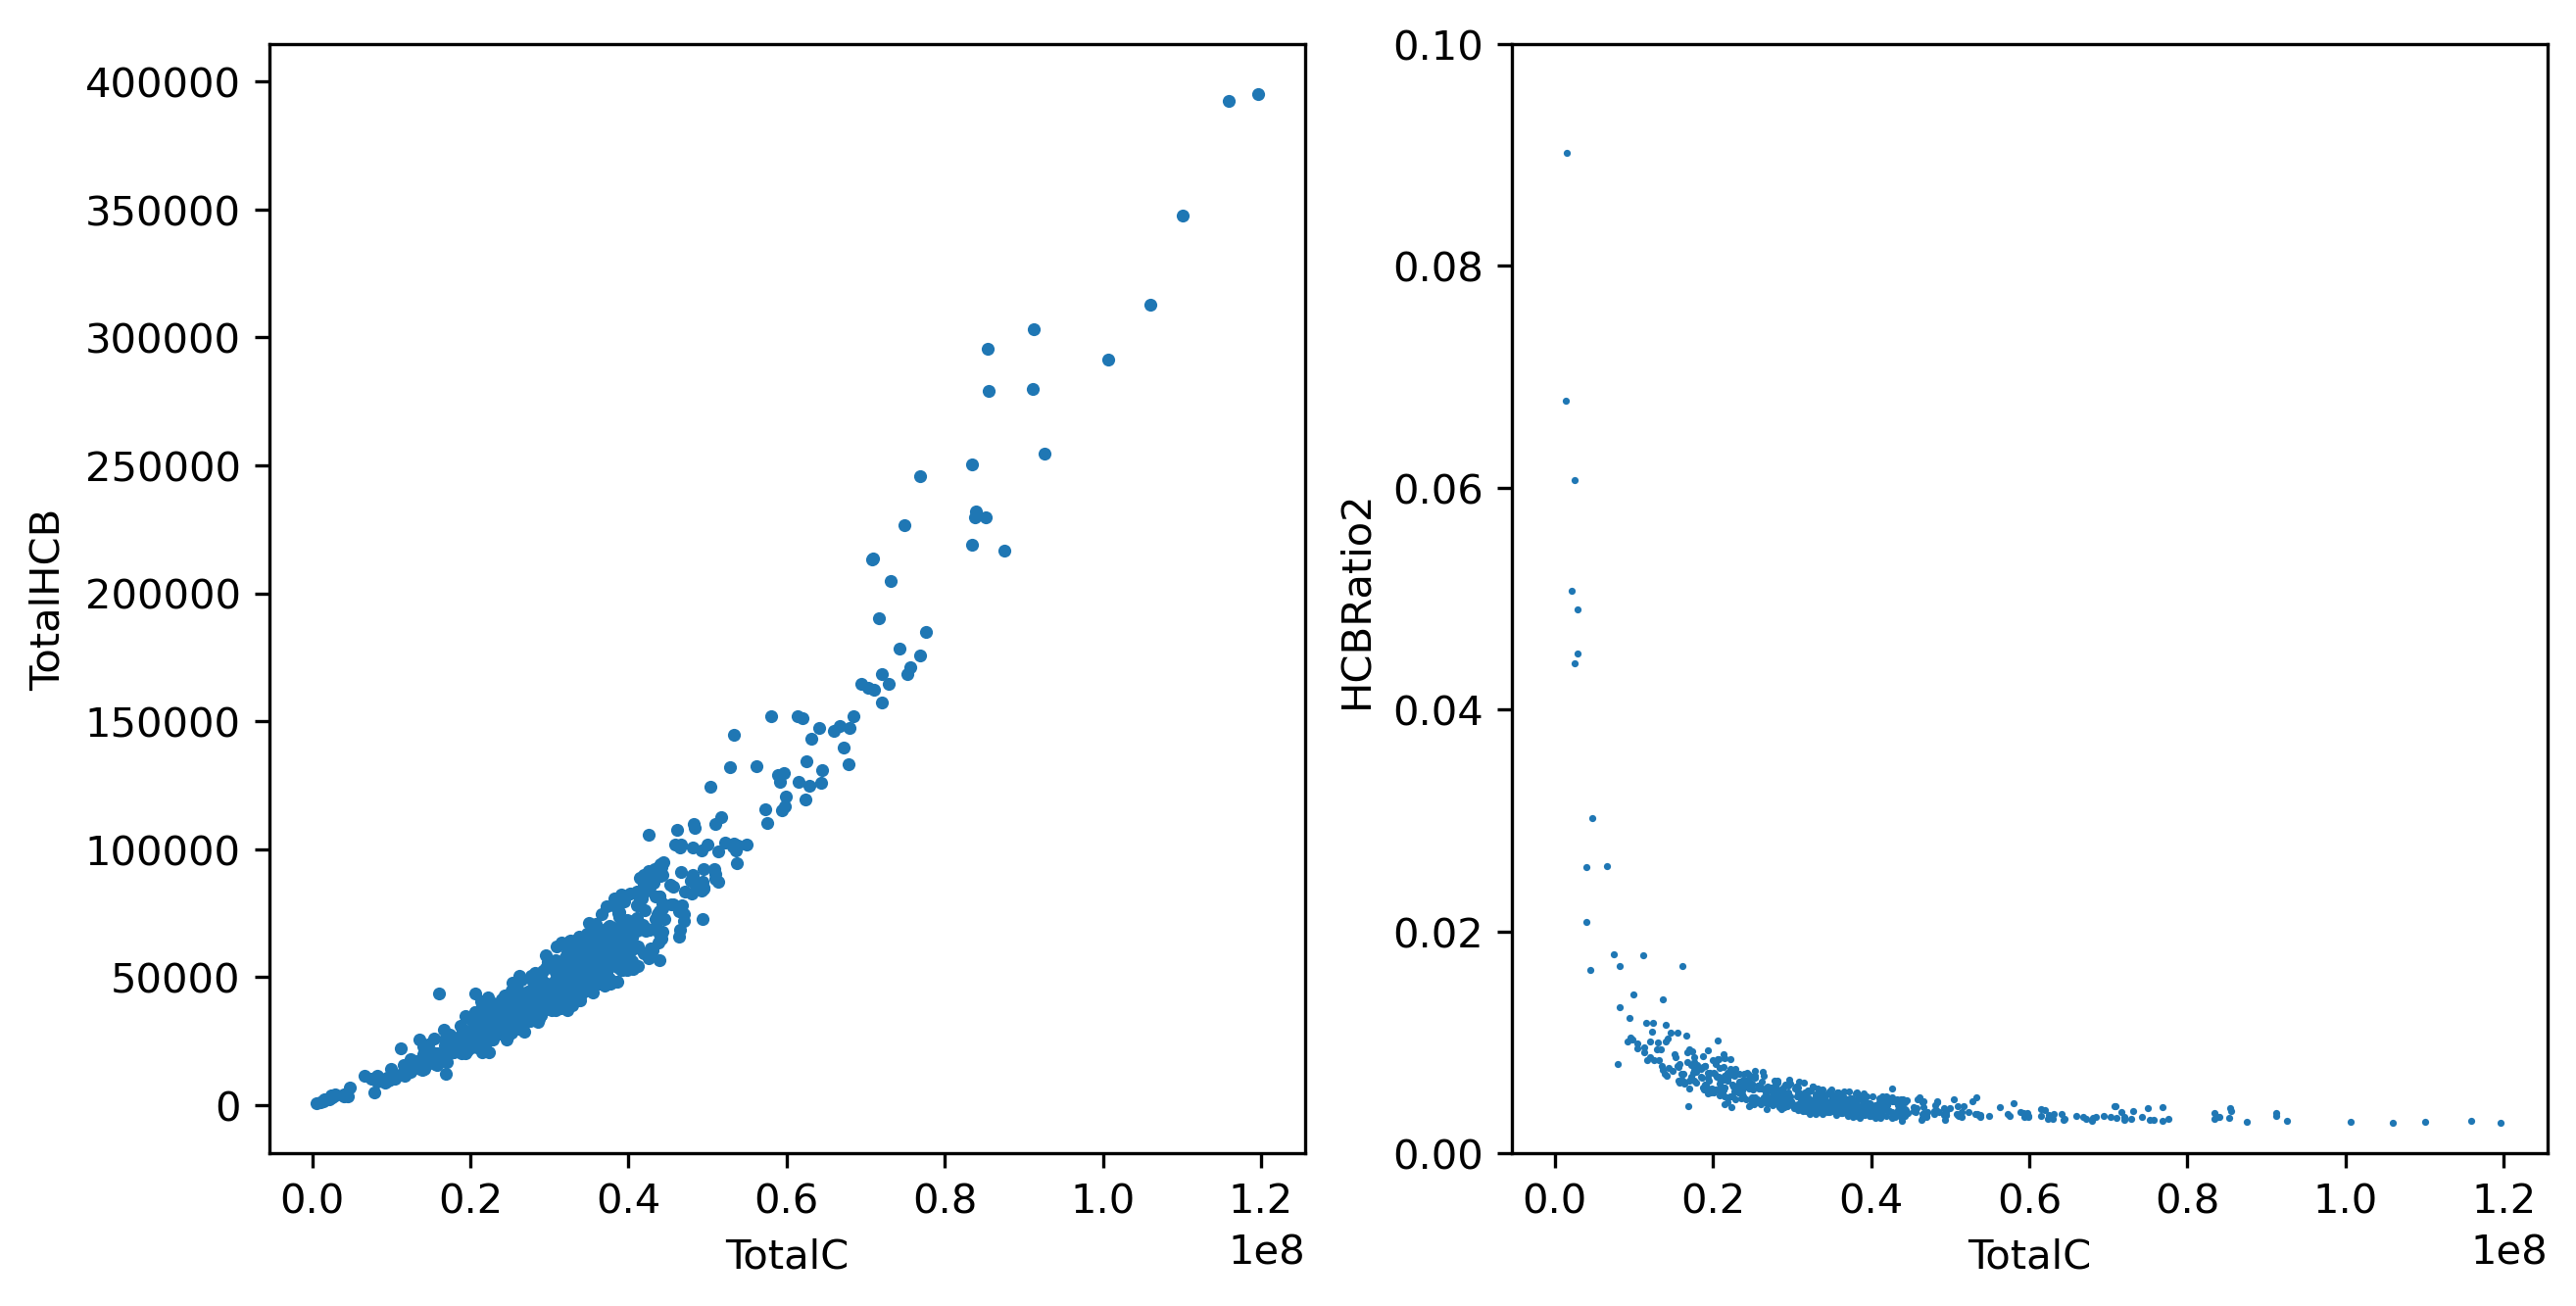

In [14]:
fig, axes = plt.subplots(figsize=(10, 5), dpi=300, ncols=2)
ax = axes[0]
sns.scatterplot(data=cell_values,
                x='TotalC',
                y='TotalHCB',
                s=10,
                linewidth=0,
                ax=ax)
ax = axes[1]
sns.scatterplot(data=cell_values,
                x='TotalC',
                y='HCBRatio2',
                s=3,
                linewidth=0,
                ax=ax)
ax.set(ylim=(0, 0.1))

In [6]:
cell_values.to_csv('LG_doublets.csv.gz')